In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **YOLOv5**

In [ ]:
!python -m pip install --upgrade pip

!pip install tensorflow

!pip install tensorboard

In [3]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import torch
from IPython.display import Image

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12557, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 12557 (delta 57), reused 63 (delta 29), pack-reused 12452
Receiving objects: 100% (12557/12557), 12.52 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (8592/8592), done.


In [6]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

### Part 2


In [18]:
import os
from random import choice
import shutil

In [28]:
imgs =[]
xmls =[]

train_path = '/content/yolov5/data/images/train'
val_path = '/content/yolov5/data/images/val'
source_path = '/content/gdrive/MyDrive/DL_projects_colab/dataset'

if not os.path.exists(train_path):
  os.mkdir(train_path)
if not os.path.exists(val_path):
  os.mkdir(val_path)

train_ratio = 0.8
val_ratio = 0.2

#total count of imgs
totalImgCount = len(os.listdir(source_path))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(source_path):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  592
Validation images are :  148


In [ ]:
imgs =[]
xmls =[]

train_path = '/content/yolov5/data/images/train'
val_path = '/content/yolov5/data/images/val'
source_path = '/content/gdrive/MyDrive/DL_projects_colab/dataset'




#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk('/content/yolov5/data/labels/train'):
    for filename in files:
      print(filename)
      os.remove(os.path.join(dirname,filename))





In [29]:
trainimagePath = '/content/yolov5/data/images/train'
trainlabelPath =  '/content/yolov5/data/labels/train'
valimagePath = '/content/yolov5/data/images/val'
vallabelPath = '/content/yolov5/data/labels/val'

if not os.path.exists(trainimagePath):
  os.mkdir(trainimagePath)
if not os.path.exists(trainlabelPath):
  os.mkdir(trainlabelPath)
if not os.path.exists(valimagePath):
  os.mkdir(valimagePath)
if not os.path.exists(vallabelPath):
  os.mkdir(vallabelPath)

for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir

    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(source_path, val_path) 

In [30]:
shutil.copy('/content/gdrive/MyDrive/DL_projects_colab/dataset.yaml', '/content/yolov5/data/dataset.yaml')

'/content/yolov5/data/dataset.yaml'

In [32]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-376-g48a8531 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [37]:
!python detect.py --source /content/gdrive/MyDrive/DL_projects_colab/traffic_sign_2.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/gdrive/MyDrive/DL_projects_colab/traffic_sign_2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-376-g48a8531 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/gdrive/MyDrive/DL_projects_colab/traffic_sign_2.jpg: 416x640 2 dangers, Done. (0.016s)
Speed: 0.6ms pre-process, 16.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


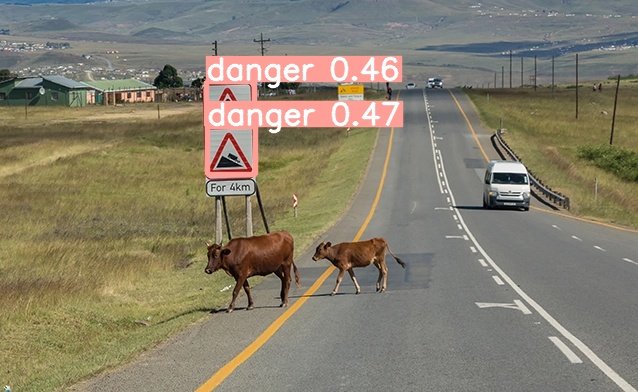

In [38]:
Image('/content/yolov5/runs/detect/exp7/traffic_sign_2.jpg')

In [42]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5l.pt --cache

Traceback (most recent call last):
  File "train.py", line 26, in <module>
    import torch
  File "/usr/local/lib/python3.7/dist-packages/torch/__init__.py", line 863, in <module>
    from torch import hub as hub
  File "/usr/local/lib/python3.7/dist-packages/torch/hub.py", line 19, in <module>
    from tqdm.auto import tqdm  # automatically select proper tqdm submodule if available
  File "/usr/local/lib/python3.7/dist-packages/tqdm/auto.py", line 29, in <module>
    from .asyncio import tqdm as asyncio_tqdm
  File "/usr/local/lib/python3.7/dist-packages/tqdm/asyncio.py", line 10, in <module>
    import asyncio
  File "/usr/lib/python3.7/asyncio/__init__.py", line 8, in <module>
    from .base_events import *
  File "/usr/lib/python3.7/asyncio/base_events.py", line 43, in <module>
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 952, in _find_and_load_unlocked
KeyboardInterrupt


In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [43]:
!python detect.py --source /content/gdrive/MyDrive/DL_projects_colab/traffic_sign_2.jpg --weights /content/yolov5/runs/train/exp3/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/gdrive/MyDrive/DL_projects_colab/traffic_sign_2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-376-g48a8531 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 367 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/gdrive/MyDrive/DL_projects_colab/traffic_sign_2.jpg: 416x640 2 dangers, Done. (0.045s)
Speed: 0.5ms pre-process, 45.3ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


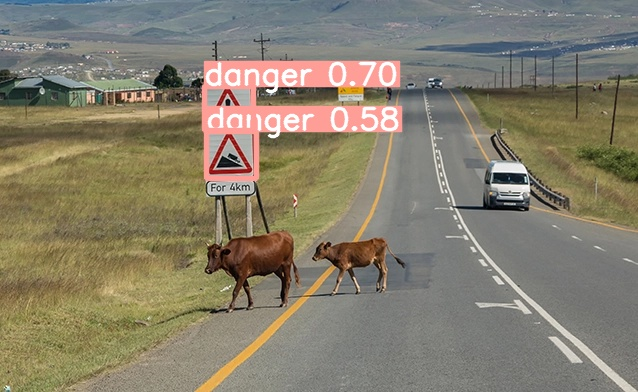

In [44]:
Image('/content/yolov5/runs/detect/exp8/traffic_sign_2.jpg')